# Support Vector Classifier
BinaryClassification problem

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification # for dataset
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [68]:
X,y= make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

In [69]:
X.shape,y.shape

((1000, 2), (1000,))

In [70]:
df= pd.DataFrame(data=X)
df

,0,1
0,1.063778,0.786463
1,-0.022944,1.008196
2,0.831093,-1.554327
3,-0.002010,1.485576
4,-0.656686,1.173017
...,...,...
995,1.266561,-0.063181
996,-1.378326,-1.036512
997,-1.195135,-0.970519
998,-1.543764,0.955433


In [71]:
df[0]

0      1.063778
1     -0.022944
2      0.831093
3     -0.002010
4     -0.656686
         ...   
995    1.266561
996   -1.378326
997   -1.195135
998   -1.543764
999   -0.404448
Name: 0, Length: 1000, dtype: float64

### Visualizing data

<Axes: xlabel='0', ylabel='1'>

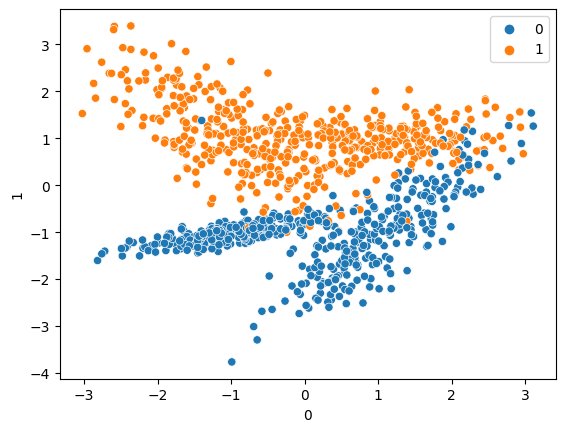

In [72]:
sns.scatterplot(x=df[0],y=df[1],hue=y)

In [73]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=0)

In [74]:
X_train.shape,y_train.shape,y_test.shape,X_test.shape

((670, 2), (670,), (330,), (330, 2))

In [75]:
## model's instance
svc = SVC(kernel='linear')
svc

SVC(kernel='linear')

In [76]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [77]:
svc.coef_

array([[-0.74251195,  2.56420559]])

In [78]:
y_pred = svc.predict(X_test)

In [79]:
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,

#### Checking Accuracy

In [80]:
accuracy_score(y_test,y_pred)

0.9666666666666667

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       160
           1       0.96      0.97      0.97       170

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [82]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[154,   6],
       [  5, 165]], dtype=int64)

In [83]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [84]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9625

In [85]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9685534591194969

In [86]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9655172413793103

## Hyper parameter tuning with SVC

In [87]:
parameters = {
    'C': [0.1,1,10,100,1000],
    'gamma': [1,0.1,0.01,0.001,0.0001]
}

In [100]:
gridCV = GridSearchCV(estimator=SVC(),param_grid=parameters,cv=5,verbose=2 # this shows complete Details its highest value is 3 
                      ,refit=True)

In [101]:
gridCV.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=2)

In [102]:
gridCV.best_params_

{'C': 1000, 'gamma': 0.001}

In [104]:
# after Hyper parameter Tuning Prediction--
y_pred1 = gridCV.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       160
           1       0.96      0.97      0.97       170

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [105]:
accuracy_score(y_test,y_pred1)

0.9666666666666667

In [106]:
confusion_matrix(y_test,y_pred1)

array([[154,   6],
       [  5, 165]], dtype=int64)

In [111]:
confusion_matrix(y_test,y_pred)


array([[154,   6],
       [  5, 165]], dtype=int64)